# Analysis of Trending Videos
## BIA610-WS Applied Analytics Module 4- Loops -- for loop 
## Sharaj Prince
## Spring 2022

**Introduction**


For this project, I wanted to determine what factors contribute to
trending videos on YouTube. Knowing these factors can be useful to 
marketing managers by eliminating research time for ad placement 
and identifying potential content creators to collaborate with.


To do this I will look at factors such as views, likes, comments, 
categories, and associated tags to see which of these factors have 
the closest relationship to time to trend.

In [1]:
## Packages needed 

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Source
- https://www.kaggle.com/code/yashvi/us-trending-videos-eda/data
- Data was collected from August 2020- April 2022


In [2]:
df1 = pd.read_csv("FR_youtube_trending_data.csv")
df2 = pd.read_csv("GB_youtube_trending_data.csv")
df3 = pd.read_csv("DE_youtube_trending_data.csv")

## Data Preparation

**Before we can get into the data preparation, I had to first import a column called "Country" with the corresponding Country for each data frame**

In [3]:
df1['Country'] = "France"
df2['Country'] = "Great Britain"
df3['Country'] = "Germany"

- I then combined the 3 data frames into one to find what variables were included in the raw data, and what new variables I would need to add to answer my research questions

In [4]:
df4= pd.concat([df1,df2,df3])

In [5]:
list(df4.columns.values)

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description',
 'Country']

- Since I want to determine the trend time of the video, I would need to add another column with the trend time, but to do this, I would first have to determine the types of data included in my new data frame and change them accordingly![image.png]

In [6]:
df4.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
Country              object
dtype: object

In [7]:
df4['trending_date'] = pd.to_datetime(df4.trending_date)
df4['publishedAt'] = pd.to_datetime(df4.publishedAt)
df4

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Country
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11 16:00:31+00:00,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12 00:00:00+00:00,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...,France
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11 10:55:22+00:00,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12 00:00:00+00:00,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...,France
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12 10:00:11+00:00,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12 00:00:00+00:00,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv...",France
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11 16:00:08+00:00,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12 00:00:00+00:00,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ...",France
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12 08:00:05+00:00,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12 00:00:00+00:00,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123738,wJW-NdF1NBw,Die Toten Hosen // Wort zum Sonntag (Offiziell...,2022-04-09 22:00:14+00:00,UCzQaHdbeofGzUvzUsLyvUIg,DIE TOTEN HOSEN,10,2022-04-18 00:00:00+00:00,die toten hosen|campino|andi|breiti|kuddel|vom...,208962,7214,0,505,https://i.ytimg.com/vi/wJW-NdF1NBw/default.jpg,False,False,Im Dezember 1981 haben wir als Band angefangen...,Germany
123739,REYU5z9tcuI,Wir wohnen im Hotel ... Wohnung unbewohnbar!,2022-04-10 16:00:36+00:00,UCbqWw1qXVof3XqBuOWi2kjA,Anne Wünsche,22,2022-04-18 00:00:00+00:00,ich habe keine lust mehr|keine lust|vlog|Allta...,70918,2398,0,0,https://i.ytimg.com/vi/REYU5z9tcuI/default.jpg,True,False,SCHON GESEHEN?\r''WIR HATTEN SO GLÜCK! die kom...,Germany
123740,zAmF50PfGEc,FIGHT HIGHLIGHTS | Ryan Garcia vs. Emmanuel Tagoe,2022-04-10 11:00:33+00:00,UCurvRE5fGcdUgCYWgh-BDsg,DAZN Boxing,17,2022-04-18 00:00:00+00:00,dazn|boxing|highlights|full fight|ko|knockout|...,4288653,55787,0,7675,https://i.ytimg.com/vi/zAmF50PfGEc/default.jpg,False,False,"April 9th, 2022 -- Ryan Garcia vs. Emmanuel Ta...",Germany
123741,NrK8TdhswHI,HATE.,2022-04-10 13:52:02+00:00,UCujETSjecFWexps5-YkCmZA,Paola Maria,24,2022-04-18 00:00:00+00:00,paola|maria|beauty|family|familie|vlog|lifesty...,81424,4048,0,305,https://i.ytimg.com/vi/NrK8TdhswHI/default.jpg,False,False,"Wenn dir das Video gefallen hat, dann kannst d...",Germany


- To find the time it took a video to trend I would have to look at the difference in time from the posting of a video to the trend date
- I also thought including the trend year would be important to see trends over time

In [8]:
df4["ElapsedTime"] = df4["trending_date"] - df4["publishedAt"] 
df4["Time_to_Trend"] = df4["ElapsedTime"].apply(lambda x: x.total_seconds()/(60*60*24)) 
df4["Year"] = df4["publishedAt"].dt.year

In [9]:
df4

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Country,ElapsedTime,Time_to_Trend,Year
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11 16:00:31+00:00,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12 00:00:00+00:00,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...,France,0 days 07:59:29,0.332975,2020
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11 10:55:22+00:00,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12 00:00:00+00:00,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...,France,0 days 13:04:38,0.544884,2020
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12 10:00:11+00:00,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12 00:00:00+00:00,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv...",France,-1 days +13:59:49,-0.416794,2020
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11 16:00:08+00:00,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12 00:00:00+00:00,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ...",France,0 days 07:59:52,0.333241,2020
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12 08:00:05+00:00,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12 00:00:00+00:00,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...,France,-1 days +15:59:55,-0.333391,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123738,wJW-NdF1NBw,Die Toten Hosen // Wort zum Sonntag (Offiziell...,2022-04-09 22:00:14+00:00,UCzQaHdbeofGzUvzUsLyvUIg,DIE TOTEN HOSEN,10,2022-04-18 00:00:00+00:00,die toten hosen|campino|andi|breiti|kuddel|vom...,208962,7214,0,505,https://i.ytimg.com/vi/wJW-NdF1NBw/default.jpg,False,False,Im Dezember 1981 haben wir als Band angefangen...,Germany,8 days 01:59:46,8.083171,2022
123739,REYU5z9tcuI,Wir wohnen im Hotel ... Wohnung unbewohnbar!,2022-04-10 16:00:36+00:00,UCbqWw1qXVof3XqBuOWi2kjA,Anne Wünsche,22,2022-04-18 00:00:00+00:00,ich habe keine lust mehr|keine lust|vlog|Allta...,70918,2398,0,0,https://i.ytimg.com/vi/REYU5z9tcuI/default.jpg,True,False,SCHON GESEHEN?\r''WIR HATTEN SO GLÜCK! die kom...,Germany,7 days 07:59:24,7.332917,2022
123740,zAmF50PfGEc,FIGHT HIGHLIGHTS | Ryan Garcia vs. Emmanuel Tagoe,2022-04-10 11:00:33+00:00,UCurvRE5fGcdUgCYWgh-BDsg,DAZN Boxing,17,2022-04-18 00:00:00+00:00,dazn|boxing|highlights|full fight|ko|knockout|...,4288653,55787,0,7675,https://i.ytimg.com/vi/zAmF50PfGEc/default.jpg,False,False,"April 9th, 2022 -- Ryan Garcia vs. Emmanuel Ta...",Germany,7 days 12:59:27,7.541285,2022
123741,NrK8TdhswHI,HATE.,2022-04-10 13:52:02+00:00,UCujETSjecFWexps5-YkCmZA,Paola Maria,24,2022-04-18 00:00:00+00:00,paola|maria|beauty|family|familie|vlog|lifesty...,81424,4048,0,305,https://i.ytimg.com/vi/NrK8TdhswHI/default.jpg,False,False,"Wenn dir das Video gefallen hat, dann kannst d...",Germany,7 days 10:07:58,7.422199,2022


## Data Preparation Conclusion

- All the variables in the raw data were necessary. In the original data set, there were 371329 rows and 16 columns.
- After adding the country, year, elapsed time, and time to trend, we can now see that there are 20 columns.
- The most important column would be trend time.
- The period may be too short to extract any insights


## Exploratory Data Analysis

**Through this exploratory data analysis, I will be able to answer the initial research questions and gain further insights into what affects the ability of a video to trend on YouTube**

Questions to answer
- On average, how long did it take for a video to trend on YouTube?
- What affects time to trend?
- What category is most frequently trends?
- What channels are frequently trending?
- What tags are frequently trending?

A video has to gain a tremendous amount of 
views for it to become trending. This along 
with the average views at the time of trending 
would allow marketing managers to gauge the 
potential viewers an ad or product placement
would reach at the time a video becomes trending.

In [10]:
stats1 = df4["Time_to_Trend"].mean()
stats1

2.886588392357352

In [11]:
stats2 = df4["view_count"].mean()
stats2

1705130.7586210612

Looking at the data through the years would allow us to see what trends have developed. Even with limited data from 2020, we can see that the trend times are substantially lower. The only category with a trend time that was higher than the following years was 19 (Travel) which makes sense considering the worldwide travel bans. However, when we look at the trends on a country-to-country basis, we see that the trend time for category 19 only decreased in Germany. The value at which it decreased effectively changed the overall average for all 3 countries.

In [12]:
table1 = df4.pivot_table(index=['categoryId'], columns=['Year'], values="Time_to_Trend", aggfunc=np.mean)
table1

Year,2020,2021,2022
categoryId,,,
1,2.445302,3.053760,3.283788
2,2.272431,2.734926,3.160986
10,2.578306,2.979731,3.315643
15,2.442817,3.556134,4.251250
17,2.161009,2.586875,3.045659
19,3.000285,2.931653,3.759486
20,2.462598,2.829730,3.108712
22,2.582787,3.248468,3.476373
23,2.619407,3.168034,3.480558


In [13]:
table3 = df4.pivot_table(index=['Country', 'categoryId'], columns=['Year'], values="Time_to_Trend", aggfunc=np.mean)
table3

Year                          2020      2021      2022
Country       categoryId                              
France        1           2.469786  2.892966  3.023333
              2           2.449035  2.750032  2.974350
              10          2.664802  3.058766  3.207447
              15          2.375813  2.795283  2.378826
              17          2.095193  2.405118  2.770681
              19          2.651978  2.661998  3.455966
              20          2.370877  2.699090  2.751605
              22          2.591598  2.961730  3.133001
              23          2.731285  3.059259  3.229776
              24          2.537405  2.922831  3.121304
              25          2.235297  2.557072  2.838319
              26          2.659399  2.953365  3.141622
              27          2.499196  2.786597  2.985609
              28          2.348465  2.822480  3.101225
              29          2.798528  2.809788  2.184236
Germany       1           2.097659  2.843087  3.273328
              2           1.971921  2.431342  3.134939
              10          2.361440  2.632772  3.281143
              15          2.113804  2.695446  4.174479
              17          1.899125  2.255892  3.118208
              19          3.212387  2.814386  4.802593
              20          2.050850  2.466529  3.156857
              22          2.378300  3.080138  3.498728
              23          1.998832  3.082866  3.621038
              24          2.176507  2.696010  3.446674
              25          1.945832  2.278326  3.184607
              26          2.387027  2.722400  3.715298
              27          2.329220  2.964889  3.564540
              28          1.969920  2.538833  3.619981
              29          1.804421  2.581214  3.733328
Great Britain 1           2.641801  3.301162  3.397313
              2           2.692237  3.392715  3.489790
              10          2.741605  3.330833  3.518214
              15          2.641097  4.871598  4.728371
              17          2.365201  2.903839  3.165026
              19          3.245585  3.291423  3.294939
              20          2.758807  3.167581  3.354044
              22          2.864593  3.595640  3.668395
              23          2.717112  3.418825  3.870654
              24          2.776687  3.333758  3.732856
              25          2.629199  2.966254  3.459420
              26          2.736344  3.730500  4.124201
              27          2.706298  3.878361  3.956473
              28          2.580793  3.328337  4.118482
              29          2.322396  3.067443  4.676659

What categories have the most views? Youtube allows the poster to decide what category their videos are included in. Views are the most important variable in this analysis as it tells us how many potential eyes will see our ads. Here we can see the breakdown of views by category in each country as well as the overall views per category in the groups of countries. This combined with the time to trend analysis gives an idea of the reach one can achieve from posting ads in different categories. For example, a music video posted in France that amasses 2.63 million views in 2.6 days will become trending. This is an important metric as we move from country to country. In Germany and Great Britain, the time to trend for Category 10 (Music) is slightly higher. Overall music videos had the most views, but Entertainment videos appeared on the trending list the most often. A reasonable assumption would be that entertainment crossover into a lot of other categories and the appearance could be a simple case of category overlap.!

In [14]:
table2 = df4.pivot_table(index="categoryId", columns="Country", values="view_count", aggfunc=np.mean)
table2

Country,France,Germany,Great Britain
categoryId,,,
1,6.734010e+05,2.683466e+06,2.702683e+06
2,2.850322e+05,4.497740e+05,1.134673e+06
10,2.636126e+06,2.793454e+06,4.373587e+06
15,1.185836e+05,5.115381e+05,1.320022e+06
17,7.770340e+05,1.263929e+06,1.192075e+06
19,2.215541e+05,1.155574e+06,1.054106e+06
20,6.937716e+05,1.622073e+06,1.996342e+06
22,6.640142e+05,1.627646e+06,2.364714e+06
23,6.301730e+05,3.092796e+06,2.343189e+06


In [15]:
table5 = df4.pivot_table(index="Country",values="view_count")
table5

,view_count
Country,
France,1.050601e+06
Germany,1.738144e+06
Great Britain,2.326640e+06


In [16]:
table10 = df4.pivot_table(index="Country",values="Time_to_Trend", aggfunc=np.mean)
table10

,Time_to_Trend
Country,
France,2.813256
Germany,2.661659
Great Britain,3.184753


In [17]:
table6 = df4.pivot_table(index="categoryId",values="view_count")
table6

,view_count
categoryId,
1,2.040507e+06
2,5.487032e+05
10,3.128837e+06
15,7.528887e+05
17,1.105274e+06
19,8.087761e+05
20,1.500805e+06
22,1.694201e+06
23,1.541619e+06


<AxesSubplot:xlabel='Country'>

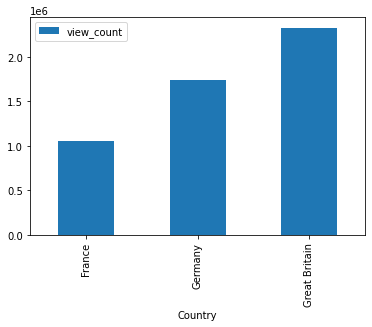

In [18]:
table5.plot(kind="bar")

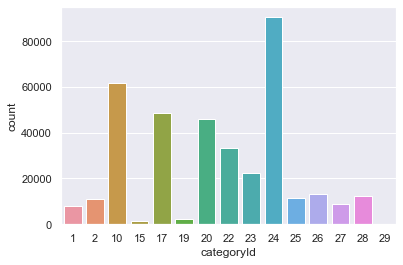

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="categoryId", data=df4)

I then went on to answer my next research question, what most affects the time it takes for a video to trend. To answer this question, I created a correlation table that confirmed that views were the most important factor. User interaction is a determining factor in trending videos, so I was initially surprised that the category id was a greater factor than comments, however, comments are the only active factor. This leads me to believe that overall Youtube viewers are simply less likely to comment on a video.!

In [20]:
check_variables = ['Time_to_Trend', 'categoryId', 'view_count', 'likes', 'comment_count', 'tags','publishedAt']
corr_table = df4[check_variables].corr()
corr_table

,Time_to_Trend,categoryId,view_count,likes,comment_count
Time_to_Trend,1.000000,0.020821,0.204253,0.118147,0.010733
categoryId,0.020821,1.000000,-0.057191,-0.081389,-0.066182
view_count,0.204253,-0.057191,1.000000,0.842813,0.557657
likes,0.118147,-0.081389,0.842813,1.000000,0.717316
comment_count,0.010733,-0.066182,0.557657,0.717316,1.000000


<AxesSubplot:>

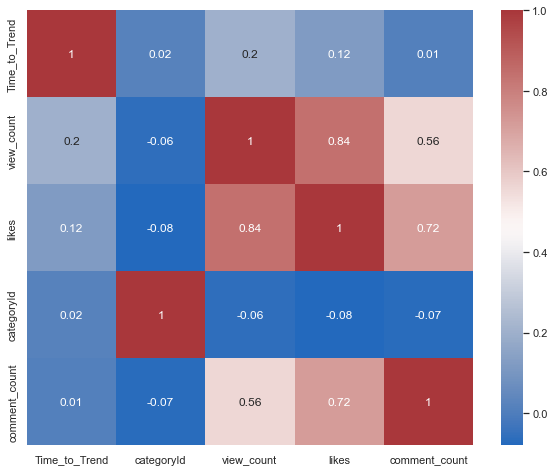

In [21]:
corr_table = corr_table.sort_values("Time_to_Trend", ascending=False).round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, cmap="vlag")

Tags can be used by creators to guide users. Knowing this we can calculate how effective these tags were at garnering views. This will also give insight into what video types/communities a marketing manager may want to collaborate with. With the correlation table, we were able to determine that comedy/funny tags had the greatest impact on both the time it took a video to trend and the number of views that video would accumulate at the time of trending. Sports comedy and entertainment were the leading tags that appeared in our data. Surprisingly, France has the second-largest urban music market, but German videos more frequently used the tag "rap". This could simply mean that the Germans are more likely to use the tag than the French.

In [22]:
tmp = df4['tags'].apply(lambda x: x.lower().split("|"))
tag_counter = {}
for i in tmp:
    for tag in i:
        tag_counter[tag] = tag_counter.get(tag, 0) + 1

In [23]:
tag_counter = pd.Series(tag_counter)
tag_counter = tag_counter.sort_values(ascending=False)

In [24]:
tag_counter

[none]                           58669
football                         16001
funny                            13201
vlog                             11708
comedy                           10752
                                 ...  
oj shoqni 2021                       1
kilian mbappe                        1
monaco - paris                       1
as monaco vs paris st germain        1
bmgkoe                               1
Length: 313738, dtype: int64

In [25]:
most_frequent_tags = tag_counter[1:11]

In [26]:
most_frequent_tags

football      16001
funny         13201
vlog          11708
comedy        10752
minecraft     10744
rap            9899
challenge      9650
highlights     9638
humour         8120
soccer         6950
dtype: int64

<AxesSubplot:>

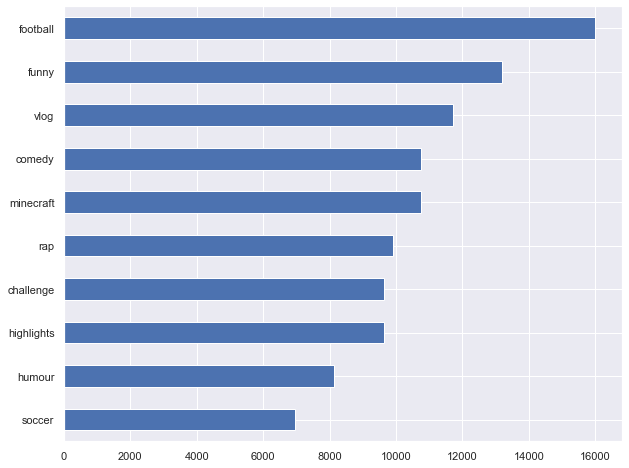

In [27]:
most_frequent_tags.sort_values().plot(kind="barh", figsize=(10,8))

In [28]:
for tag in most_frequent_tags.index:
    df4[tag] = df4['tags'].apply(lambda x: 1 if tag in x else 0)

In [29]:
df4[['tags']+most_frequent_tags.index.tolist()]

,tags,football,funny,vlog,comedy,minecraft,rap,challenge,highlights,humour,soccer
0,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,0,0,0,0,0,0,0,0,0,0
1,[None],0,0,0,0,0,0,0,0,0,0
2,franglish|tory lanez|my salsa|c'est plus l'heu...,0,0,0,0,0,0,0,0,0,0
3,[None],0,0,0,0,0,0,0,0,0,0
4,ducati|hypermotard|950|rve|essai|test|supermot...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123738,die toten hosen|campino|andi|breiti|kuddel|vom...,0,0,0,0,0,0,0,0,0,0
123739,ich habe keine lust mehr|keine lust|vlog|Allta...,0,0,1,0,0,0,0,0,0,0
123740,dazn|boxing|highlights|full fight|ko|knockout|...,0,0,0,0,0,0,0,1,0,0
123741,paola|maria|beauty|family|familie|vlog|lifesty...,0,0,1,0,0,0,0,0,0,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'football'),
  Text(0, 1, 'funny'),
  Text(0, 2, 'vlog'),
  Text(0, 3, 'comedy'),
  Text(0, 4, 'minecraft'),
  Text(0, 5, 'rap'),
  Text(0, 6, 'challenge'),
  Text(0, 7, 'highlights'),
  Text(0, 8, 'humour'),
  Text(0, 9, 'soccer')])

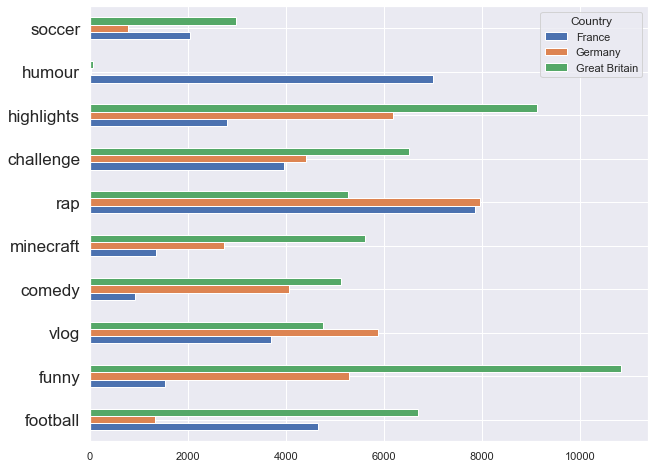

In [30]:
df4.groupby("Country")[most_frequent_tags.index.tolist()].sum().T.plot(kind="barh", figsize=(10,8))
plt.yticks(fontsize=17)

In [31]:
stats3 = df4[['view_count']+most_frequent_tags.index.tolist()].corr()
stats3

,view_count,football,funny,vlog,comedy,minecraft,rap,challenge,highlights,humour,soccer
view_count,1.000000,-0.023638,0.030515,-0.035605,0.008355,0.003414,-0.016993,0.010221,-0.022091,-0.029454,-0.010041
football,-0.023638,1.000000,0.006550,-0.025516,-0.002349,-0.030787,0.007632,0.013906,0.298299,-0.022993,0.622441
funny,0.030515,0.006550,1.000000,0.099762,0.393238,0.142634,-0.021835,0.180122,-0.002653,-0.009732,0.020412
vlog,-0.035605,-0.025516,0.099762,1.000000,0.063212,-0.007332,-0.018329,0.057650,-0.028448,0.008139,-0.021843
comedy,0.008355,-0.002349,0.393238,0.063212,1.000000,0.002813,-0.014193,0.050195,-0.024514,0.010020,0.003336
minecraft,0.003414,-0.030787,0.142634,-0.007332,0.002813,1.000000,-0.016725,0.233610,0.008547,-0.014063,-0.020613
rap,-0.016993,0.007632,-0.021835,-0.018329,-0.014193,-0.016725,1.000000,-0.010773,-0.045222,-0.013652,0.031406
challenge,0.010221,0.013906,0.180122,0.057650,0.050195,0.233610,-0.010773,1.000000,-0.019298,0.075113,0.017765
highlights,-0.022091,0.298299,-0.002653,-0.028448,-0.024514,0.008547,-0.045222,-0.019298,1.000000,-0.031576,0.132383
humour,-0.029454,-0.022993,-0.009732,0.008139,0.010020,-0.014063,-0.013652,0.075113,-0.031576,1.000000,-0.016936


<AxesSubplot:>

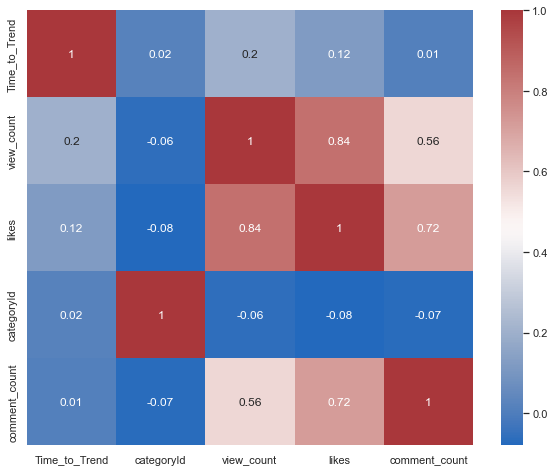

In [32]:
corr_table2 = stats3.sort_values("view_count", ascending=False).round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, cmap="vlag")

In [33]:
stats4 = df4[['Time_to_Trend']+most_frequent_tags.index.tolist()].corr()
stats4

,Time_to_Trend,football,funny,vlog,comedy,minecraft,rap,challenge,highlights,humour,soccer
Time_to_Trend,1.000000,-0.030572,0.031983,-0.005288,0.015761,0.015665,0.001391,0.016428,-0.047996,0.003701,-0.013503
football,-0.030572,1.000000,0.006550,-0.025516,-0.002349,-0.030787,0.007632,0.013906,0.298299,-0.022993,0.622441
funny,0.031983,0.006550,1.000000,0.099762,0.393238,0.142634,-0.021835,0.180122,-0.002653,-0.009732,0.020412
vlog,-0.005288,-0.025516,0.099762,1.000000,0.063212,-0.007332,-0.018329,0.057650,-0.028448,0.008139,-0.021843
comedy,0.015761,-0.002349,0.393238,0.063212,1.000000,0.002813,-0.014193,0.050195,-0.024514,0.010020,0.003336
minecraft,0.015665,-0.030787,0.142634,-0.007332,0.002813,1.000000,-0.016725,0.233610,0.008547,-0.014063,-0.020613
rap,0.001391,0.007632,-0.021835,-0.018329,-0.014193,-0.016725,1.000000,-0.010773,-0.045222,-0.013652,0.031406
challenge,0.016428,0.013906,0.180122,0.057650,0.050195,0.233610,-0.010773,1.000000,-0.019298,0.075113,0.017765
highlights,-0.047996,0.298299,-0.002653,-0.028448,-0.024514,0.008547,-0.045222,-0.019298,1.000000,-0.031576,0.132383
humour,0.003701,-0.022993,-0.009732,0.008139,0.010020,-0.014063,-0.013652,0.075113,-0.031576,1.000000,-0.016936


<AxesSubplot:>

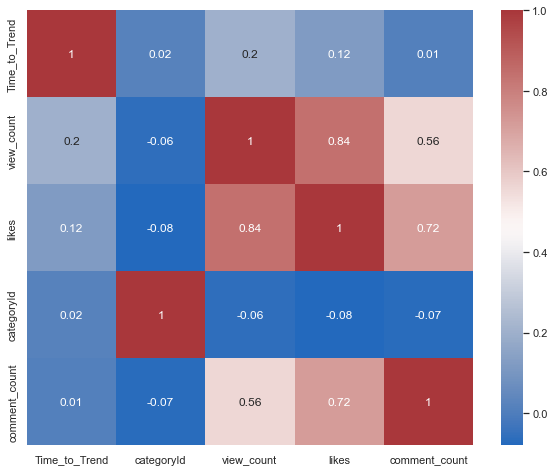

In [34]:
corr_table3 = stats4.sort_values("Time_to_Trend", ascending=False).round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, cmap="vlag")

The plots below show trending videos in relation to views accumulated. It is important to note that most videos achieved trending status in 20 days or less with all the videos reaching trending status by day 35 of posting. The breakdown by country shows that much of the visible outliers in terms of time to trend are from Germany and Great Britain. This was a surprise considering the average trend time for German videos was the shortest.

In [35]:
df4["log_view_count"] = np.log(df4['view_count']+1)

<Figure size 720x576 with 0 Axes>

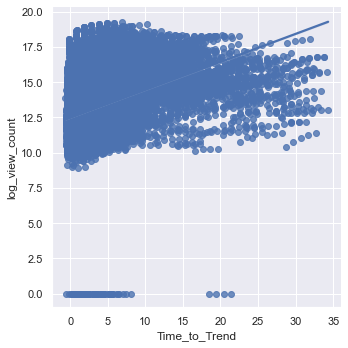

In [36]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'Time_to_Trend', y = 'log_view_count', data = df4)

<Figure size 720x576 with 0 Axes>

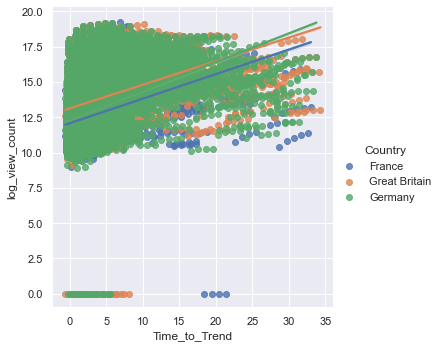

In [37]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'Time_to_Trend', y = 'log_view_count', data = df4, hue="Country")

The goal of this analysis was to develop a method to identify potential marketing partners, either through product placement, collaboration, or direct advertisement. To do this we would have to identify specific YouTube channels that are trending regularly. The more established channels (top15) would already have corporate partners and it would be unlikely that they would easily move away from them. For this reason, we look at the next 25. These channels would represent emerging popularity. They are gaining popularity and are more likely to accept an offer.

In [38]:
tmp = df4['channelTitle'].apply(lambda x: x.lower().split("|"))
channel_counter = {}
for i in tmp:
    for channel in i:
        channel_counter[channel] = channel_counter.get(channel, 0) + 1

In [39]:
channel_counter = pd.Series(channel_counter)
channel_counter = channel_counter.sort_values(ascending=False)

In [40]:
channel_counter

sky sports football             1541
bein sports france              1340
the united stand                1332
bt sport                        1138
jp performance                  1007
                                ... 
badlinu                            1
rialtofilm                         1
cedmusic                           1
dsc arminia bielefeld              1
die autogesellschaft dresden       1
Length: 11980, dtype: int64

In [41]:
most_frequent_channelTitle = channel_counter[1:16]
most_frequent_channelTitle

bein sports france      1340
the united stand        1332
bt sport                1138
jp performance          1007
formula 1                991
berlin - tag & nacht     904
sky sport hd             758
wwe                      756
smtown                   747
ligue 1 uber eats        713
fuze iii                 708
michou                   679
squeezie                 672
köln 50667               648
jyp entertainment        647
dtype: int64

<AxesSubplot:>

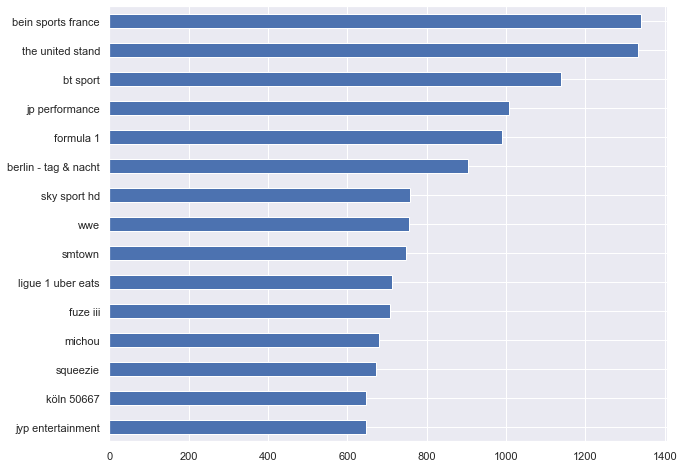

In [42]:
most_frequent_channelTitle.sort_values().plot(kind="barh", figsize=(10,8))

In [43]:
most_frequent_channelTitle2 = channel_counter[16:40]

In [44]:
most_frequent_channelTitle2

nfl                                 624
rmc sport                           617
amixem                              611
mrbeast                             597
tagesschau                          588
hugodécrypte                        559
bangtantv                           534
clash of clans                      532
dude perfect                        525
krass schule - die jungen lehrer    520
blackpink                           514
joyca                               511
moresidemen                         505
spacex                              496
apex legends                        495
michouoff                           476
mrbeast gaming                      474
goal deutschland                    467
canal+ sport                        463
romain dot live                     463
dazn uefa champions league          445
squeezie gaming                     442
brawl stars                         442
mastu                               437
dtype: int64

<AxesSubplot:>

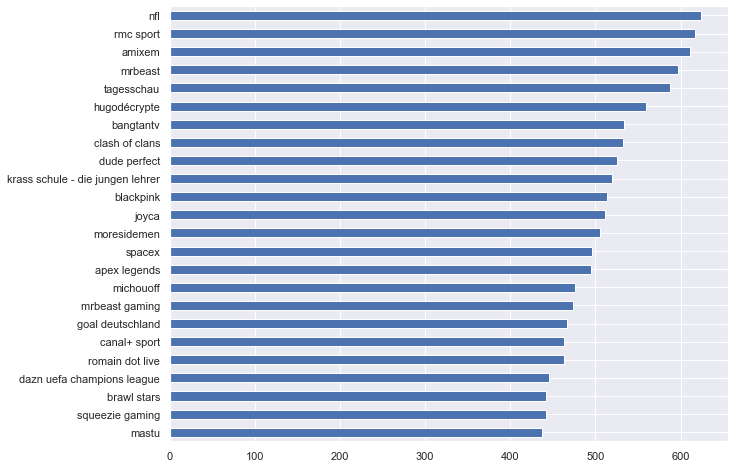

In [45]:
most_frequent_channelTitle2.sort_values().plot(kind="barh", figsize=(10,8))

## Summary

We were able to determine that the average trending video on Youtube achieves that status approximately 2.8 days after posting. The variable that affects trend time the most is the views. We confirmed this with a line plot that showed that most of the views occurred before 20 days. As such, we can conclude that the speed of views is more important than the views. Because of the numerous forms of entertainment that cross the YouTube categories, we concluded that Entertainment was the most frequent category to trend. beIN Sports (1340) was the most frequently trending channel which is in line with the findings from the tags analysis which found that football was the most frequently trending tag (16001). It was no surprise that the NFL channel was in the next 25 channels in terms of trending. The NFL has been trying to break into the European market for years, and it seems that European viewership is now allowing American Football to trend.

The data did not have a static metric such as subscriber count which would have given us a base to use a predictive analysis tool. I hypothesize that the channels with a higher subscriber count are more frequently trending. Going further, having all youtube videos would give us a base to measure what videos tend to achieve trending status.
